# 📘 One-Class SVM: Anomaly Detection with Synthetic Data

## 🧭 Introduction

In this notebook, we explore **One-Class Support Vector Machine (One-Class SVM)** — a powerful algorithm used for **unsupervised anomaly detection**. The goal is to identify data points that deviate from the norm, without having explicit labels for anomalies during training.

One-Class SVM is especially useful when:
- You only have access to *normal data* during training
- Anomalies are *rare, unexpected*, or *hard to define*
- You want to build a model that learns the concept of “normality” and flags everything else as suspicious

## 📌 What You'll Learn

This notebook walks you through a **complete pipeline** for anomaly detection using One-Class SVM, including:

✅ Generating synthetic data with known outliers  
✅ Visualizing and analyzing the data distribution  
✅ Preprocessing data with normalization  
✅ Training a One-Class SVM model on normal data only  
✅ Making predictions and flagging anomalies  
✅ Evaluating model performance with metrics  
✅ Visualizing decision boundaries and outlier regions

## 🧪 Why Synthetic Data?

To demonstrate the power and limitations of One-Class SVM in a controlled environment, we generate synthetic 2D data using `make_blobs` from `sklearn.datasets` and manually inject outliers. This allows us to visualize the decision boundary and understand how the algorithm behaves under ideal and challenging conditions.


In [1]:
# 📘 One-Class SVM - Anomaly Detection with Synthetic Data

## 🧪 Step 1: Imports and Setup

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
# 🎯 Step 2: Generate Synthetic Data
X_normal, _ = make_blobs(n_samples=300, centers=[[0, 0]], cluster_std=0.5, random_state=42)

# Generate outliers far from the cluster
X_outliers = np.random.uniform(low=-4, high=4, size=(30, 2))

# Combine into one dataset
X_all = np.vstack([X_normal, X_outliers])

# Create ground-truth labels (1: normal, -1: outlier)
y_true = np.ones(X_all.shape[0])
y_true[-len(X_outliers):] = -1


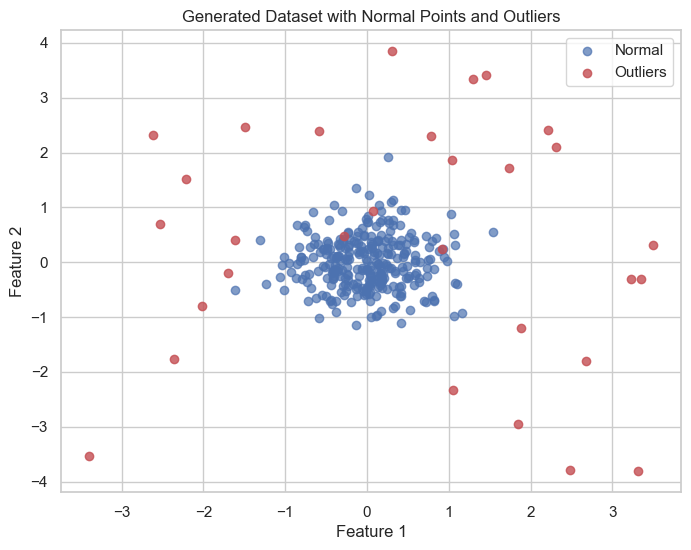

In [3]:
# 🔍 Step 3: Visualize the Data
plt.figure(figsize=(8, 6))
plt.scatter(X_normal[:, 0], X_normal[:, 1], label="Normal", alpha=0.7)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], label="Outliers", color="r", alpha=0.8)
plt.title("Generated Dataset with Normal Points and Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In [4]:
# ⚙️ Step 4: Preprocess the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)


In [5]:
# 🧠 Step 5: Train One-Class SVM
clf = OneClassSVM(kernel="rbf", gamma=0.5, nu=0.1)
clf.fit(X_scaled[:300])  # Only normal data

# Predict on the full dataset (normal + outliers)
y_pred = clf.predict(X_scaled)


In [6]:
#📊 Step 6: Evaluate Model Performance
# Replace 1/-1 with 0/1 for confusion matrix compatibility
y_pred_bin = np.where(y_pred == 1, 1, -1)

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_bin))
print("\nClassification Report:")
print(classification_report(y_true, y_pred_bin, target_names=["Outlier", "Normal"]))


Confusion Matrix:
[[ 27   3]
 [ 30 270]]

Classification Report:
              precision    recall  f1-score   support

     Outlier       0.47      0.90      0.62        30
      Normal       0.99      0.90      0.94       300

    accuracy                           0.90       330
   macro avg       0.73      0.90      0.78       330
weighted avg       0.94      0.90      0.91       330



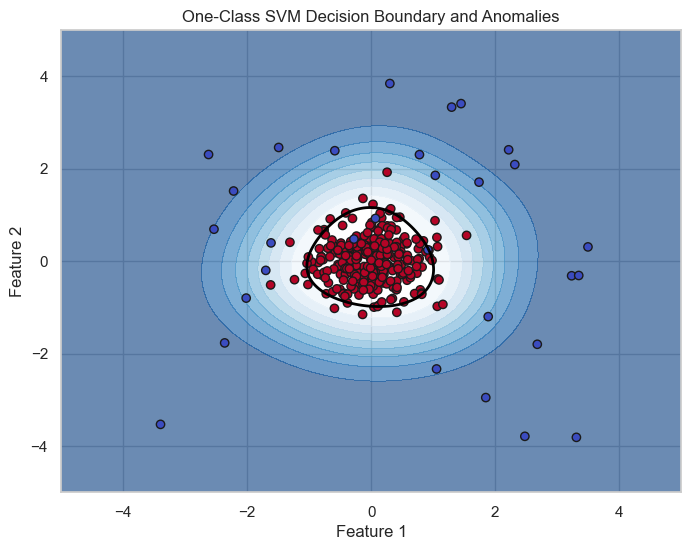

In [7]:
# 📈 Step 7: Visualize the Decision Boundary
# Create meshgrid for decision function plotting
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)
Z = clf.decision_function(grid_scaled)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 10), cmap=plt.cm.Blues_r, alpha=0.6)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.scatter(X_all[:, 0], X_all[:, 1], c=y_true, cmap="coolwarm", edgecolors='k')
plt.title("One-Class SVM Decision Boundary and Anomalies")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
